
# I will show you guys, how to create a Small/Sample Dataset from a HUGE dataset, I'll be using Flickr30K. 

**Add Flickr30K dataset in your kaggle notebook. [Input section]**


# Let's start

In [45]:
# Import important libraries and follow my instructions 

import os
import random
import shutil

from PIL import Image
import matplotlib.pyplot as plt

# Original Dataset

In [46]:
# Set paths to your original dataset

image_dir = '/kaggle/input/flickr30k/Images/flickr30k_images'  # img directory path
caption_file = '/kaggle/input/flickr30k/captions.txt'  # caption file path


# Now let us load the data from the original dataset.

image_file = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
num_img = len(image_file)
print("Number of Images in the Original Dataset = ", num_img)


with open(caption_file, 'r') as f:
    captions = f.readlines()
    num_captions = len(captions)
print("Number of Captions  in the Original Dataset = ", num_captions)

Number of Images in the Original Dataset =  31783
Number of Captions  in the Original Dataset =  158916


# Sample Dataset Creation

In [47]:
# Here we are going to create an environment for the new Sample Dataset.
# Set the number of images you want to select for the Sample dataset

num_images = 200
num_captions = 5  # each image has 5 captions

# Create a new directory for the small dataset
small_image_dir = '/kaggle/working/sample_flickr/images'
small_caption_file = '/kaggle/working/sample_flickr/captions.txt'

# Create the new directories if they don't exist
os.makedirs(small_image_dir, exist_ok=True)

# Create the new directories, CLEARING THEM IF THEY EXIST
if os.path.exists(small_image_dir):
    shutil.rmtree(small_image_dir)  # Delete entire dir
os.makedirs(small_image_dir)  # Recreate fresh dir



In [48]:
# Load the captions and map image filenames to their captions
image_to_captions = {}

with open(caption_file, 'r') as file:
    for line in file:
        line = line.strip()
        if not line:
            continue
        parts = line.split(',', 1)
        if len(parts) < 2:
            continue
        image_filename = parts[0]
        caption = parts[1]
        if image_filename not in image_to_captions:
            image_to_captions[image_filename] = []
        image_to_captions[image_filename].append(caption)

# Randomly select 200 images, We are adding random 200 images
sample_images = random.sample(list(image_to_captions.keys()), num_images)

# Write captions to a NEW FILE 

with open(small_caption_file, 'w') as new_caption_file:
    for image_filename in sample_images:
        
        image_path = os.path.join(image_dir, image_filename)
        new_image_path = os.path.join(small_image_dir, image_filename)
        shutil.copy(image_path, new_image_path)
        captions = image_to_captions[image_filename]
        
        for caption in captions:
            new_caption_file.write(f'{image_filename},{caption}\n')


In [49]:
# Check number of images and captions in the small dataset

image_file = [f for f in os.listdir(small_image_dir) if f.endswith('.jpg')]
num_img = len(image_file)
print("Number of Images in the Sample Dataset = ", num_img)


with open(small_caption_file, 'r') as f:
    captions = f.readlines()
    num_captions = len(captions)
print("Number of Captions in the Sample Dataset = ", num_captions)

Number of Images in the Sample Dataset =  200
Number of Captions in the Sample Dataset =  1000


# Sample Data Visualization

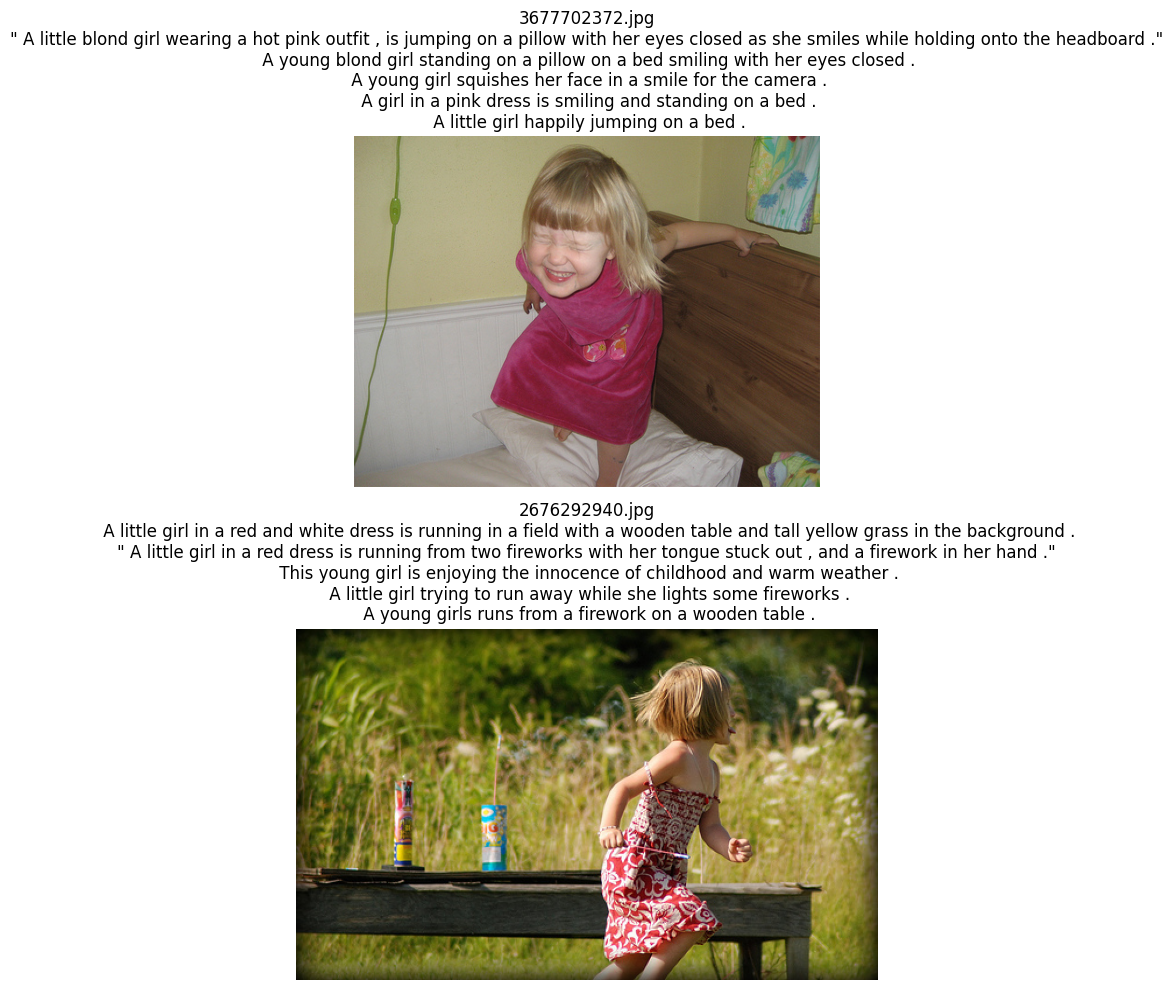

In [50]:
# Select 2 random images from the Sample dataset just for visualization
small_image_files = [f for f in os.listdir(small_image_dir) if f.endswith('.jpg')]
sample_images = random.sample(small_image_files, 2)


plt.figure(figsize=(8, len(sample_images) * 5))  
for i, image_filename in enumerate(sample_images):
    image_path = os.path.join(small_image_dir, image_filename)
    image = Image.open(image_path)
    
    plt.subplot(len(sample_images), 1, i + 1)  
    plt.imshow(image)
    plt.axis('off')  
    
    captions = image_to_captions.get(image_filename, [])
    caption_text = '\n'.join(captions)  
    plt.title(f"{image_filename}\n{caption_text}", fontsize=12)

plt.tight_layout()
plt.show()

# This is how you can create a Sample Dataset from a huge Dataset.

# And do you experiment on that Sample Dataset